In [49]:
# Import Modułów
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import patsy
import numpy as np

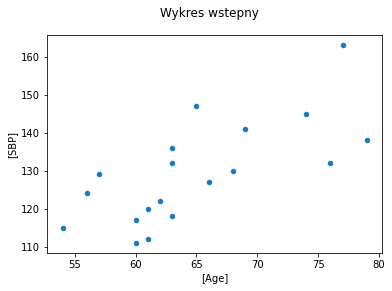


Coef = [[1.53186559]]
Intercept = [30.82039397]

Roznica miedzy predykcja a rzeczywistym wynikiem : 
[[ -0.82155272  11.73232908  13.8377752    5.73232908  -7.39513326
   12.26419467   4.98725377   3.79606025  -4.67207416   9.32792584
    4.26419467  -8.67207416 -10.86326767 -16.60834299]]



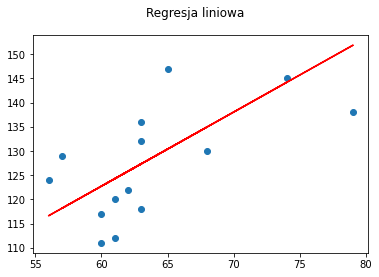


średni błąd bezwzględny = 8.212464823704682
Błąd średniokwadratowy = 85.93726424856948
Pierwiastek błędu średniokwadratowego = 9.270235393374296


In [59]:
def linear_reg(name, X_name, y_name):
    
    # Odczytanie danych
    data = pd.read_csv(name)
    DF = pd.DataFrame(data)

    # Wstępny wykres
    DF.plot.scatter(x=X_name,y=y_name,marker='o')
    plt.suptitle('Wykres wstepny')
    plt.show()

    # Dzielenie na podzbiory
    X = DF[X_name]
    y = DF[y_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, train_size=0.3)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    # Tworzenie modelu
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Wypisywanie wskaznikow
    print("\nCoef = {a}".format(a=model1.coef_))
    print("Intercept = {a}\n".format(a=model1.intercept_))
    # Coef to współczynniki wielomianu opisującego zmienne zależne i niezależne
    # Intercept to wartości zmiennych niezależnych dla zmiennych zależnych równych 0
    # W interpretacji geometrycznej, coef to nachylenie prostej, a intercept to miejsce przecięcia z osią Y

    # Predykcja czesci testowej
    y_pred = model1.predict(X_test)
    print("Roznica miedzy predykcja a rzeczywistym wynikiem : \n{a}\n".format(a=(y_pred - y_test).T))

    # Wykresy
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, 'r')
    plt.suptitle('Regresja liniowa')
    plt.show()

    # Walidacja danych
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('\nśredni błąd bezwzględny = {a}'.format(a=mae))
    print('Błąd średniokwadratowy = {a}'.format(a=mse))
    print('Pierwiastek błędu średniokwadratowego = {a}'.format(a=rmse))
    
#linear_reg('SCORES.csv', ['Hours'], ['Scores'])
linear_reg('SBP.csv', ['Age'], ['SBP'])